In [1]:
from PIL import Image
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import matplotlib.pyplot as plt

In [2]:
img = Image.open("image_capturee.jpg")
img_data = img.getdata()

lst=[]
for i in img_data:

    # lst.append(i[0]*0.299+i[1]*0.587+i[2]*0.114) ### Rec. 609-7 weights
    lst.append(i[0]*0.2125+i[1]*0.7174+i[2]*0.0721) ### Rec. 709-6 weights

new_img = Image.new("L", img.size)
new_img.putdata(lst)

new_img.show()
new_img.save("imagem2x2.png")

In [3]:
img7 = Image.open("imagem2x2.png")

In [4]:
img_gray = img7.convert("L")

img_array = np.array(img_gray)

threshold = 138
binary_matrix = (img_array > threshold).astype(np.uint8)
print(binary_matrix)


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [5]:
neighborhood_size = 1

neighb= neighborhood_size

ematrix = np.pad(binary_matrix, neighb, mode='constant', constant_values=0)
print(ematrix)

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 ...
 [0 1 1 ... 1 1 0]
 [0 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]]


In [6]:
lig, colon = ematrix.shape


print("Matrix Height:", lig)
print("Matrix Width:", colon)

Matrix Height: 367
Matrix Width: 282


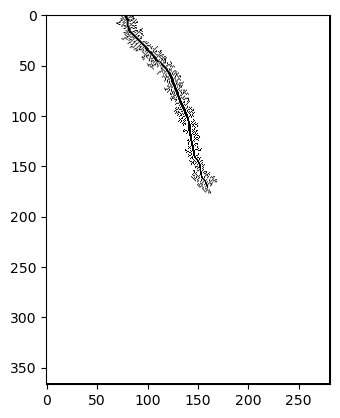

In [14]:
p00=0.0000000   

c1=0.2
c2=0.1

c3=0.002
c4=0.0001

 

c5=0.00001
p3=0.000001

rows = 367
cols = 282

grid = np.pad(binary_matrix, neighb, mode='constant', constant_values=0)


grid_states = [grid.copy()]

def update_grid(grid):
    new_grid = grid.copy()
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == 1:
                
                neighbors = [
                    grid[i-1, j-1], grid[i-1, j], grid[i-1, j+1],
                    grid[i, j-1], grid[i, j+1], grid[i+1, j-1], grid[i+1, j], grid[i+1, j+1]
                ]
                
                if neighbors in [
                    [0, 1, 1, 1, 1, 0, 1, 1], [0, 1, 0, 1, 1, 1, 1, 1],
                    [1, 1, 0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 0, 1, 0], [0, 0, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 0, 1, 1, 1],
                    [1, 1, 1, 0, 1, 0, 1, 1], [1, 0, 0, 1, 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 1, 1, 0], [1, 1, 1, 1, 1, 0, 0, 1]
                ]:
                    if random.random() < c4:
                        new_grid[i, j] = 0
                        
                
                        
                elif neighbors in [
                    [0, 1, 1, 1, 1, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1, 1], [1, 1, 1, 0, 0, 1, 1, 1], [1, 0, 1, 1, 1, 1, 0, 1], [0, 1, 1, 1, 1, 1, 0, 1], [1, 1, 0, 1, 1, 1, 0, 1],
                    [1, 1, 1, 1, 0, 0, 1, 1], [1, 0, 1, 1, 1, 1, 1, 0],
                    [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 1, 0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0, 1, 1, 1], [1, 0, 1, 1, 1, 0, 1, 1]
                ]:
                    if random.random() < c3:
                        new_grid[i, j] = 0
                        
                        
                               
                        
                elif neighbors in [
                    [0, 1, 1, 1, 1, 1, 1, 1],[1, 1, 0, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 0, 1, 1]
                ]:
                    if random.random() < c1:
                        new_grid[i, j] = 0                 
                        
                elif neighbors in [
                    [1, 0, 1, 1, 1, 1, 1, 1],[1, 1, 1, 0, 1, 1, 1, 1],
                    [1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1]
                ]:
                    if random.random() < c2:
                        new_grid[i, j] = 0 
    
                elif neighbors in [
                    [1, 1, 1, 1, 1, 1, 1, 1]
                ]:
                    if random.random() < p00:
                        new_grid[i, j] = 0
                        
                else:
                    if random.random() < c5:
                        new_grid[i, j] = 0
            
    
    new_grid[0, :] = 0  
    new_grid[-1, :] = 0  
    new_grid[:, 0] = 0  
    new_grid[:, -1] = 0  

    return new_grid
                    

iterations = 15
for _ in range(iterations):
    grid = update_grid(grid)
    grid_states.append(grid.copy())


for i, state in enumerate(grid_states):
    plt.imshow(state, cmap='gray', vmin=0, vmax=1)  
    plt.savefig(f'2x2c1c2c4_15it_{i}.png', dpi=1200)

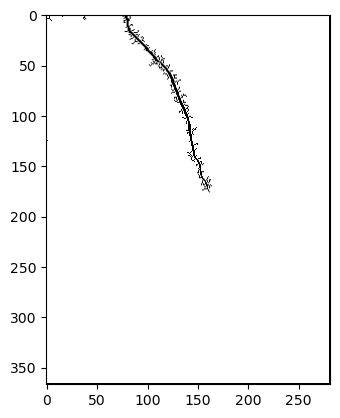

In [15]:
p00=0.0000000   #(LLOW)

p11=0.1
p12=0.15

p21=0.02
p22=0.01

p23=0.15 # Adjust
p24=0.15 #Adjust

p25=0.15 # adjust5

p31=0.001
p32=0.002
p33=0.002
p34=0.002
p35=0.002
p36=0.0001
p37=0.0001

p41=0.0001
p42=0.0001

p43=0.0002
p44=0.0002
p45=0.0001
p46=0.0001
p47=0.0001

p51=0.0001
p52=0.0001
p53=0.0001
p54=0.00001
p55=0.00001
p56=0.00001

p61=0.0001
p62=0.0001
p63=0.00001
p64=0.0001
p65=0.0001

p71=0.0001
p72=0.0001

p8=0.0002

rows = 242
cols = 214

grid = np.pad(binary_matrix, neighb, mode='constant', constant_values=0)


grid_states = [grid.copy()]


def update_grid(grid):
    new_grid = grid.copy()
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == 1:
                
                neighbors = [
                    grid[i-1, j-1], grid[i-1, j], grid[i-1, j+1],
                    grid[i, j-1], grid[i, j+1], grid[i+1, j-1], grid[i+1, j], grid[i+1, j+1]
                ]
                
                if neighbors in [
                    [0, 1, 1, 1, 1, 0, 1, 1], [0, 1, 0, 1, 1, 1, 1, 1],
                    [1, 1, 0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 0, 1, 0]
                ]:
                    if random.random() < p21:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 0, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 0, 1, 1, 1],
                    [1, 1, 1, 0, 1, 0, 1, 1], [1, 0, 0, 1, 1, 1, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 1, 1, 0], [1, 1, 1, 1, 1, 0, 0, 1]
                ]:
                    if random.random() < p22:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 1, 1, 1, 1, 1, 1, 0], [1, 1, 0, 1, 1, 0, 1, 1]
                ]:
                    if random.random() < p23:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [1, 1, 1, 0, 0, 1, 1, 1], [1, 0, 1, 1, 1, 1, 0, 1]
                ]:
                    if random.random() < p24:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 1, 1, 1, 1, 1, 0, 1], [1, 1, 0, 1, 1, 1, 0, 1],
                    [1, 1, 1, 1, 0, 0, 1, 1], [1, 0, 1, 1, 1, 1, 1, 0],
                    [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 1, 0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0, 1, 1, 1], [1, 0, 1, 1, 1, 0, 1, 1]
                ]:
                    if random.random() < p25:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 1, 1, 0, 1, 0, 1, 1], [1, 1, 0, 1, 0, 1, 1, 0],
                    [0, 0, 0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0, 0]
                ]:
                    if random.random() < p31:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 0, 1, 1, 1, 0, 1, 1], [0, 1, 0, 0, 1, 1, 1, 1],
                    [1, 1, 1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 0, 0, 1, 0],
                    [1, 1, 0, 1, 1, 1, 0, 0], [0, 1, 1, 0, 1, 0, 0, 1],
                    [0, 1, 0, 1, 0, 1, 1, 1], [1, 1, 1, 1, 0, 0, 1, 0]
                ]:
                    if random.random() < p32:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 1, 0, 1, 1, 0, 1, 1], [0, 1, 1, 1, 1, 0, 1, 0],
                    [1, 1, 0, 1, 1, 0, 1, 0], [0, 1, 0, 1, 1, 1, 1, 0]
                ]:
                    if random.random() < p33:
                        new_grid[i, j] = 0
                
                elif neighbors in [
                    [0, 1, 1, 0, 1, 1, 1, 0], [0, 0, 1, 1, 1, 1, 1, 0],
                    [1, 1, 0, 1, 1, 0, 0, 1], [0, 1, 1, 1, 1, 1, 0, 0],
                    [0, 1, 1, 1, 0, 1, 1, 0], [1, 1, 0, 1, 0, 0, 1, 1],
                    [1, 0, 0, 1, 1, 0, 1, 1], [1, 1, 0, 0, 1, 0, 1, 1]
                ]:
                    if random.random() < p34:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 1, 1, 1, 0, 0, 1, 1], [1, 0, 1, 1, 1, 0, 1, 0],
                    [1, 1, 0, 0, 1, 1, 1, 0], [0, 1, 0, 1, 1, 1, 0, 1]
                ]:
                    if random.random() < p35:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [1, 1, 1, 0, 0, 1, 0, 1], [1, 0, 1, 1, 0, 1, 0, 1],
                    [1, 0, 1, 0, 0, 1, 1, 1], [1, 0, 1, 0, 1, 1, 0, 1]
                ]:
                    if random.random() < p36:
                        new_grid[i, j] = 0
                elif neighbors in [
                    [1, 1, 1, 1, 0, 1, 0, 0], [1, 0, 0, 1, 0, 1, 1, 1],
                    [0, 0, 1, 0, 1, 1, 1, 1], [1, 1, 1, 0, 1, 0, 0, 1]
                ]:
                    if random.random() < p37:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 0, 1, 0, 1, 0, 1, 1], [1, 1, 1, 0, 1, 0, 0, 0],
                    [1, 1, 0, 1, 0, 1, 0, 0], [0, 0, 0, 1, 0, 1, 1, 1],
                    [0, 1, 1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 1, 1, 0],
                    [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0, 0]
                ]:
                    if random.random() < p41:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 1, 1, 1, 1, 0, 0, 0], [0, 1, 0, 1, 0, 1, 1, 0],
                    [1, 1, 0, 1, 0, 0, 1, 0], [0, 1, 1, 0, 1, 0, 1, 0],
                    [0, 0, 0, 1, 1, 1, 1, 0], [1, 1, 0, 1, 1, 0, 0, 0],
                    [0, 1, 0, 0, 1, 0, 1, 1], [0, 0, 0, 1, 1, 0, 1, 1]
                ]:
                    if random.random() < p42:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 1, 0, 1, 1, 0, 1, 0]
                ]:
                    if random.random() < p43:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 0, 1, 1, 1, 0, 0, 1], [1, 1, 1, 0, 0, 0, 1, 0],
                    [1, 0, 0, 1, 1, 1, 0, 0], [0, 1, 0, 0, 0, 1, 1, 1]
                ]:
                    if random.random() < p44:
                        new_grid[i, j] = 0   
                        
                elif neighbors in [
                    [0, 0, 1, 1, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0],
                    [1, 0, 1, 0, 1, 0, 1, 0], [0, 1, 1, 1, 0, 0, 0, 1],
                    [1, 1, 0, 0, 1, 1, 0, 0], [0, 1, 0, 0, 1, 1, 0, 1],
                    [0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 1, 0, 0, 1, 0]
                ]:
                    if random.random() < p45:
                        new_grid[i, j] = 0    
                        
                elif neighbors in [
                    [0, 1, 1, 1, 0, 0, 1, 0], [0, 1, 0, 1, 1, 1, 0, 0],
                    [1, 0, 0, 1, 1, 0, 1, 0], [0, 0, 1, 1, 1, 0, 1, 0],
                    [0, 1, 0, 0, 1, 1, 1, 0], [0, 1, 0, 1, 1, 0, 0, 1],
                    [1, 1, 0, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 0, 1, 1]
                    
                ]:
                    if random.random() < p46:
                        new_grid[i, j] = 0    
                        
                elif neighbors in [
                    [1, 0, 1, 0, 0, 1, 0, 1]
                ]:
                    if random.random() < p47:
                        new_grid[i, j] = 0
                        
                elif neighbors in [
                    [0, 0, 0, 0, 1, 0, 1, 1], [1, 1, 0, 1, 0, 0, 0, 0],
                    [0, 1, 1, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 1, 1, 0]
                ]:
                    if random.random() < p51:
                        new_grid[i, j] = 0       
                        
                elif neighbors in [
                    [0, 1, 1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0, 1],
                    [1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 1, 0, 1, 0],
                    [0, 0, 0, 0, 1, 1, 1, 0], [0, 0, 0, 1, 0, 0, 1, 1],
                    [1, 1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0]
                    
                ]:
                    if random.random() < p52:
                        new_grid[i, j] = 0 
                        
                elif neighbors in [
                    [0, 1, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0, 1, 0],
                    [0, 1, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 1, 0]
                ]:
                    if random.random() < p53:
                        new_grid[i, j] = 0      
                        
                elif neighbors in [
                    [1, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 1],
                    [1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1]
                ]:
                    if random.random() < p54:
                        new_grid[i, j] = 0        
                        
                elif neighbors in [
                    [1, 0, 0, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 0, 0, 1],
                    [0, 1, 0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0, 1, 0]
                ]:
                    if random.random() < p55:
                        new_grid[i, j] = 0            
                        
                elif neighbors in [
                    [0, 1, 0, 0, 0, 0, 1, 1], [0, 1, 0, 0, 0, 1, 1, 0],
                    [0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 1],
                    [1, 1, 0, 0, 0, 0, 1, 0], [0, 1, 1, 0, 0, 0, 1, 0],
                    [0, 0, 0, 1, 1, 1, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0]
                ]:
                    if random.random() < p56:
                        new_grid[i, j] = 0         
                        
                elif neighbors in [
                    [0, 0, 0, 0, 1, 0, 0, 1], [1, 0, 0, 1, 0, 0, 0, 0],
                    [0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 0]
                ]:
                    if random.random() < p61:
                        new_grid[i, j] = 0            
                        
                elif neighbors in [
                    [0, 0, 0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0, 0],
                    [0, 0, 0, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 0, 0, 0]
                ]:
                    if random.random() < p62:
                        new_grid[i, j] = 0 
                        
                elif neighbors in [
                    [0, 0, 0, 1, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0]
                ]:
                    if random.random() < p63:
                        new_grid[i, j] = 0   
                        
                elif neighbors in [
                    [1, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0]
                ]:
                    if random.random() < p64:
                        new_grid[i, j] = 0             
                        
                elif neighbors in [
                    [1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 1],
                    [1, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1]
                ]:
                    if random.random() < p65:
                        new_grid[i, j] = 0             
                        
                elif neighbors in [
                    [0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 0, 1, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0]
                ]:
                    if random.random() < p71:
                        new_grid[i, j] = 0                
                        
                elif neighbors in [
                    [1, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 1],
                    [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0]
                ]:
                    if random.random() < p72:
                        new_grid[i, j] = 0 
                        
                elif neighbors in [
                    [0, 0, 0, 0, 0, 0, 0, 0]
                ]:
                    if random.random() < p8:
                        new_grid[i, j] = 0            
                               
                        
                elif neighbors in [
                    [0, 1, 1, 1, 1, 1, 1, 1],[1, 1, 0, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 0, 1, 1]
                ]:
                    if random.random() < p11:
                        new_grid[i, j] = 0                 
                        
                elif neighbors in [
                    [1, 0, 1, 1, 1, 1, 1, 1],[1, 1, 1, 0, 1, 1, 1, 1],
                    [1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1]
                ]:
                    if random.random() < p12:
                        new_grid[i, j] = 0 
    
                elif neighbors in [
                    [1, 1, 1, 1, 1, 1, 1, 1]
                ]:
                    if random.random() < p00:
                        new_grid[i, j] = 0
    
    new_grid[0, :] = 0  
    new_grid[-1, :] = 0  
    new_grid[:, 0] = 0  
    new_grid[:, -1] = 0  

    return new_grid
                    

iterations = 10
for _ in range(iterations):
    grid = update_grid(grid)
    grid_states.append(grid.copy())


for i, state in enumerate(grid_states):
    plt.imshow(state, cmap='gray', vmin=0, vmax=1)  
    plt.savefig(f'2x2_tous_10iit_{i}.png', dpi=1200)
